# Deep Learning Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the CSV and Preform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
# Remove space in "FALSE POSITIVE"
df['koi_disposition'].replace({'FALSE POSITIVE':'FALSE_POSITIVE'}, inplace=True)

In [5]:
y = df['koi_disposition']
target_names = list(df['koi_disposition'].unique())
# Print the target names
target_names

['CONFIRMED', 'FALSE_POSITIVE', 'CANDIDATE']

In [6]:
X = df.drop("koi_disposition",axis=1)
print(X.shape, y.shape)

(6991, 40) (6991,)


## Create a Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y)

## Data Pre-processing

In [8]:
# Use MinMaxScaler to scale the X values
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Label Encode the y values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [12]:
# Convert encoded y values to categorical values
from keras.utils import to_categorical

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [13]:
y_train_categorical.shape

(5243, 3)

## Train the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=40))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 14,503
Trainable params: 14,503
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(X_train_scaled.shape, y_train_categorical.shape)

(5243, 40) (5243, 3)


In [18]:
# Fit the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2)

Train on 5243 samples
Epoch 1/100
5243/5243 - 1s - loss: 0.5404 - accuracy: 0.7437
Epoch 2/100
5243/5243 - 0s - loss: 0.3644 - accuracy: 0.8236
Epoch 3/100
5243/5243 - 0s - loss: 0.3499 - accuracy: 0.8220
Epoch 4/100
5243/5243 - 1s - loss: 0.3426 - accuracy: 0.8280
Epoch 5/100
5243/5243 - 0s - loss: 0.3325 - accuracy: 0.8333
Epoch 6/100
5243/5243 - 0s - loss: 0.3289 - accuracy: 0.8423
Epoch 7/100
5243/5243 - 0s - loss: 0.3298 - accuracy: 0.8358
Epoch 8/100
5243/5243 - 0s - loss: 0.3187 - accuracy: 0.8474
Epoch 9/100
5243/5243 - 0s - loss: 0.3215 - accuracy: 0.8465
Epoch 10/100
5243/5243 - 0s - loss: 0.3136 - accuracy: 0.8484
Epoch 11/100
5243/5243 - 0s - loss: 0.3070 - accuracy: 0.8566
Epoch 12/100
5243/5243 - 0s - loss: 0.3086 - accuracy: 0.8541
Epoch 13/100
5243/5243 - 0s - loss: 0.2980 - accuracy: 0.8585
Epoch 14/100
5243/5243 - 0s - loss: 0.3013 - accuracy: 0.8623
Epoch 15/100
5243/5243 - 0s - loss: 0.2946 - accuracy: 0.8648
Epoch 16/100
5243/5243 - 0s - loss: 0.2947 - accuracy: 0.

In [19]:
# Print the models loss and accuracy scores
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1748/1748 - 0s - loss: 0.2983 - accuracy: 0.8850
Deep Neural Network - Loss: 0.29827573677222297, Accuracy: 0.8850114345550537


In [20]:
# Get the non-encoded predicted values
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [21]:
# Create DataFrame of the predicted vs actual values, Create 3rd column that shows if predicted is equal to actual
actual_vs_predict = pd.DataFrame({'Predicted':prediction_labels,'Actual':y_test})
actual_vs_predict['Predicted=Actual'] = (actual_vs_predict['Predicted']==actual_vs_predict['Actual']).values
actual_vs_predict.head()

,Predicted,Actual,Predicted=Actual
1981,CANDIDATE,CANDIDATE,True
5609,FALSE_POSITIVE,FALSE_POSITIVE,True
532,FALSE_POSITIVE,FALSE_POSITIVE,True
6558,CANDIDATE,CANDIDATE,True
1249,FALSE_POSITIVE,FALSE_POSITIVE,True


## Performance Evaluation

In [22]:
# Calculate and print the number of misclassified samples
num_misclass = actual_vs_predict['Predicted=Actual'].sum()
total_num = len(actual_vs_predict)
print(f'Total Number of Samples : {total_num}')
print(f'Number of Misclassified Samples : {num_misclass}')

Total Number of Samples : 1748
Number of Misclassified Samples : 1547


In [23]:
# Print the training score and testing score
train_loss, train_accuracy = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(f'Train Score : {train_accuracy}')
print(f'Test Score : {model_accuracy}')

5243/5243 - 0s - loss: 0.2046 - accuracy: 0.9109
Train Score : 0.9109288454055786
Test Score : 0.8850114345550537


In [24]:
# Print the classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction_labels))

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.69      0.76       422
     CONFIRMED       0.75      0.85      0.80       450
FALSE_POSITIVE       0.98      0.99      0.99       876

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.85      1748
  weighted avg       0.89      0.89      0.88      1748



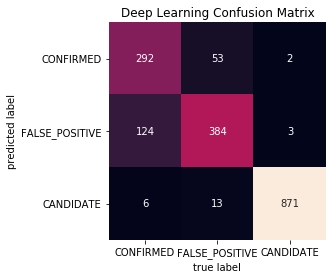

In [25]:
# Show the Confusion Matrix, save the figure
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, prediction_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y.unique(),
            yticklabels=y.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Deep Learning Confusion Matrix')
plt.savefig('Output/DeepLearning_ConfusionMatrix.png')

[0.84, 0.69, 0.76, 422.0]
[0.75, 0.85, 0.8, 450.0]
[0.98, 0.99, 0.99, 876.0]
plotMat: [[0.84, 0.69, 0.76, 422.0], [0.75, 0.85, 0.8, 450.0], [0.98, 0.99, 0.99, 876.0]]
support: [422, 450, 876]


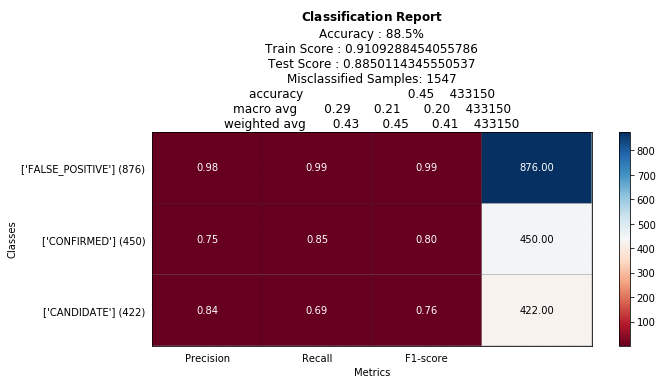

In [26]:
# Display a graph of the classification report
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title, cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')
    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 4)]:
        t = line.strip().split()
        if len(t) < 2: continue
        if len(t)>0:
            classes.append(t[:len(t)-4])
        v = [float(x) for x in t[-4:]]
        support.append(int(t[-1]))
        class_names.append(t[:len(t)-4])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.savefig('Output/DL_CR_plot.png',bbox_inches='tight')

# Print the training score, testing score, accuracy (percentage), number of misclassified labels as the title of the figure
from sklearn import metrics
train_score = train_accuracy
test_score = model_accuracy
accuracy_desc = metrics.accuracy_score(y_test, prediction_labels)
accuracy_perc = accuracy_desc*100
count_misclassified_desc = num_misclass
bold = r"$\bf{"+'Classification '+"}$"
bold2 = ' '
bold3 = r"$\bf{"+'Report'+"}$"
not_bold = f'\nAccuracy : {round(accuracy_perc,2)}%\nTrain Score : {train_score}\nTest Score : {test_score}\nMisclassified Samples: {count_misclassified_desc}\naccuracy                           0.45    433150\nmacro avg       0.29      0.21      0.20    433150\nweighted avg       0.43      0.45      0.41    433150'
title = bold + bold2 + bold3 + not_bold

# Plot the classification report
plot_classification_report(classification_report(y_test, prediction_labels),title)